In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
print(dataset.head())
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [17]:
print(len(dataset))
print(dataset.columns)

150
Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'], dtype='object')


**normalize featurs**

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 6.65383723e-01, -8.47978700e-01,  8.67185941e-01,
         9.09237570e-01],
       [ 1.76755308e+00, -3.76879422e-01,  1.44595298e+00,
         7.76015948e-01],
       [-9.26638681e-01,  1.74306733e+00, -1.33212879e+00,
        -1.22230838e+00],
       [ 5.42920461e-01,  5.65319133e-01,  1.27232287e+00,
         1.70856730e+00],
       [-9.26638681e-01,  1.74306733e+00, -1.10062198e+00,
        -1.08908676e+00],
       [ 1.75530675e-01, -1.41329783e-01,  5.77802423e-01,
         7.76015948e-01],
       [-8.04175420e-01,  1.03641841e+00, -1.33212879e+00,
        -1.35553000e+00],
       [ 9.10310246e-01, -3.76879422e-01,  4.62049016e-01,
         1.09907838e-01],
       [ 1.03277351e+00, -1.41329783e-01,  6.93555830e-01,
         6.42794326e-01],
       [ 1.75530675e-01,  8.00868772e-01,  4.04172313e-01,
         5.09572704e-01],
       [-1.04910194e+00,  3.29769494e-01, -1.50575890e+00,
        -1.35553000e+00],
       [-1.04910194e+00, -1.79017725e+00, -2.90348129e-01,
      

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
#minkowski
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [27]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

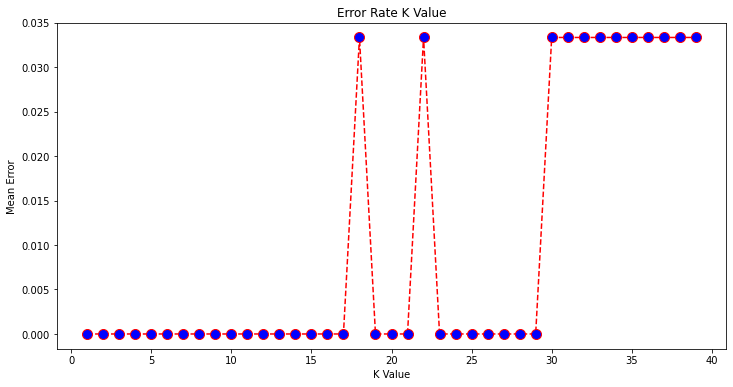

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [32]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[1.         0.95833333 0.91666667 0.875      1.        ]
cv_scores mean:0.95
